# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [ ]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  15 139 174 253 254
  218 139  14   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 103 211 252 252 217 168
  168 246 184  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 150 253 252 180 100  12   0
    0 135 252  95   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 140 253 169   7   0   0   0
    0 197 252 121   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18 147  

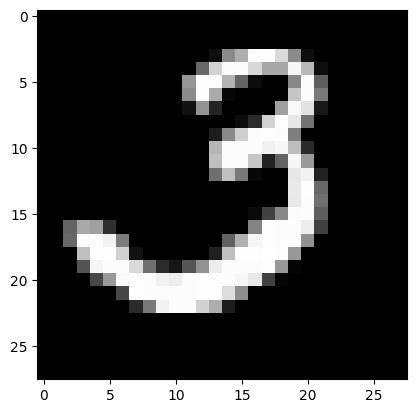

In [ ]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images_orig.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

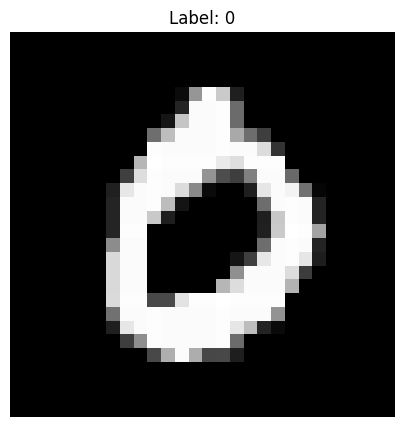

The label of the fourth image is: 0


In [3]:
import matplotlib.pyplot as plt

# Get the fourth image from the test set (index 3)
fourth_image = test_images_orig[3]
fourth_label = test_labels[3]

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(fourth_image, cmap='gray')
plt.title(f"Label: {fourth_label}")
plt.axis('off')
plt.show()

print(f"The label of the fourth image is: {fourth_label}")


# A first look at a neural network

## **Step 1:** The network architecture

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [5]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [7]:
train_images = train_images_orig.reshape((60000, 28 * 28))
test_images = test_images_orig.reshape((10000, 28 * 28))


### Tensor reshaping

In [9]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [10]:
a = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

# Reshape a to 6x1
a_reshaped = a.reshape((6, 1))

print("Original shape:", a.shape)
print("Reshaped to 6x1:")
print(a_reshaped)
print("New shape:", a_reshaped.shape)

Original shape: (3, 2)
Reshaped to 6x1:
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
New shape: (6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

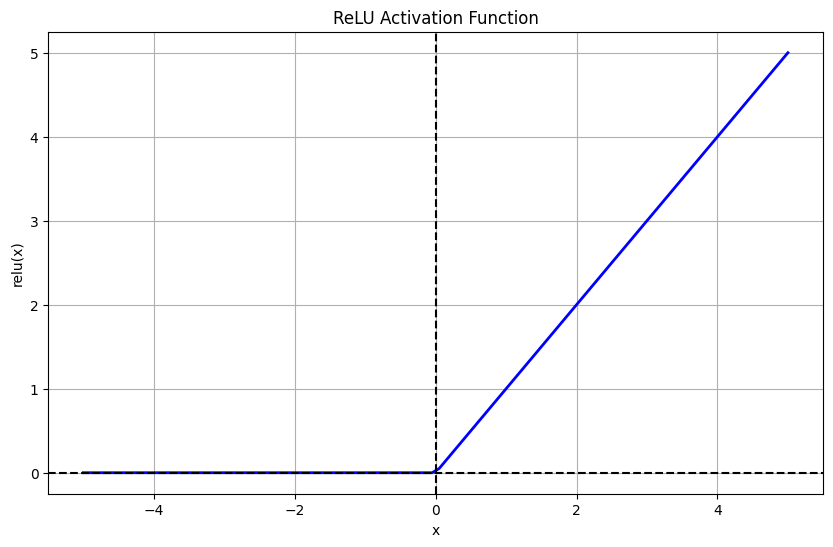

ReLU of [-2 -1  0  1  2] is [0 0 0 1 2]


In [12]:
def relu(x):
    return np.maximum(0, x)

# Create an array of x values
x = np.linspace(-5, 5, 100)

# Calculate y values using the relu function
y = relu(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

# Test the function with a sample array
test_array = np.array([-2, -1, 0, 1, 2])
print("ReLU of", test_array, "is", relu(test_array))

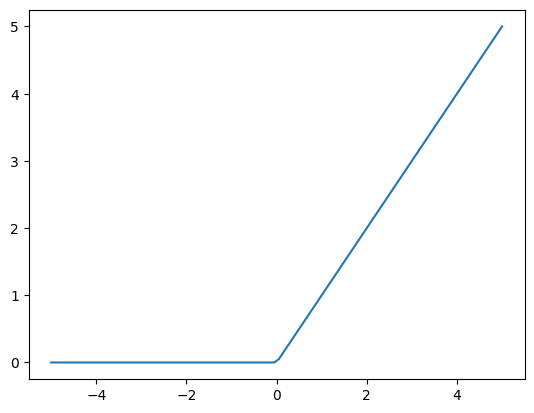

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here: 0,5,0,0,6


### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

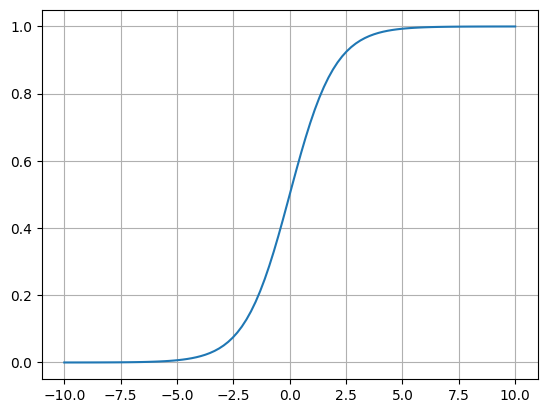

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

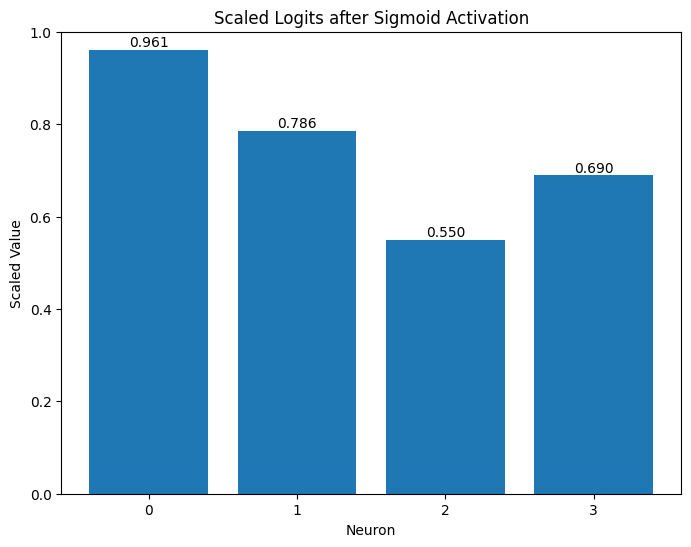

Scaled logits: [0.96083428 0.78583498 0.549834   0.68997448]


In [14]:

# Given logits
logits = np.array([3.2, 1.3, 0.2, 0.8])

# Apply sigmoid function to scale the logits
logits_scaled = sigmoid(logits)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(4), logits_scaled)
plt.title('Scaled Logits after Sigmoid Activation')
plt.xlabel('Neuron')
plt.ylabel('Scaled Value')
plt.xticks(np.arange(4))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Add value labels on top of each bar
for i, v in enumerate(logits_scaled):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.show()

print("Scaled logits:", logits_scaled)

In [15]:
0.961, 0.786, 0.550, 0.690

(0.961, 0.786, 0.55, 0.69)

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [ ]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

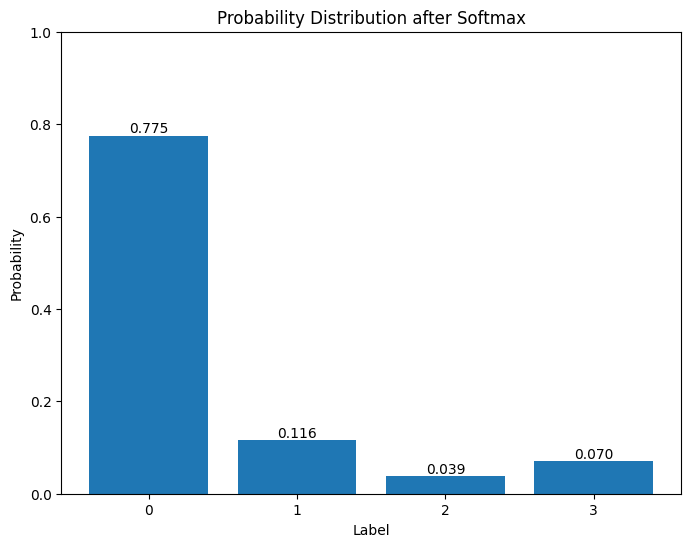

Probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Sum of probabilities: 1.0000000000000002


In [16]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))
probs = softmax(logits)

plt.figure(figsize=(8, 6))
plt.bar(range(4), probs)
plt.title('Probability Distribution after Softmax')
plt.xlabel('Label')
plt.ylabel('Probability')
plt.xticks(range(4))
plt.ylim(0, 1)

for i, prob in enumerate(probs):
    plt.text(i, prob, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

print("Probabilities:", probs)
print("Sum of probabilities:", np.sum(probs))

[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


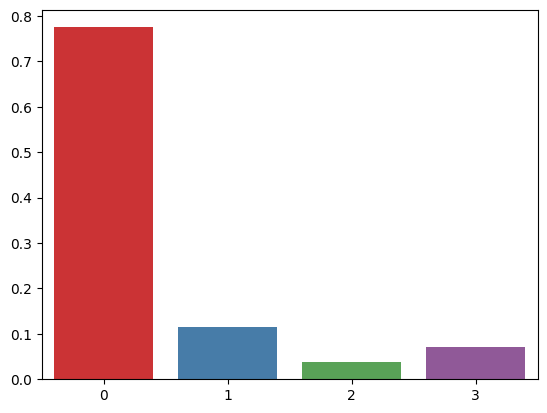

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [17]:
predicted_class = np.argmax(probs)
print(f"Predicted class: {predicted_class}")


Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [21]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8351 - loss: 17.0816
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9550 - loss: 0.7837
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9654 - loss: 0.4645
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9735 - loss: 0.3975
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9782 - loss: 0.3145


## **Step 4:** Using the model to make predictions

In [19]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


array([[2.2694081e-30, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        3.6663323e-20, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.2895079e-16, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.1510987e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:

The prediction array contains the model's output probabilities for each of the three test digits. Let's interpret these values:
For the first test digit (test_images):
The highest probability (1.0) is in the 4th position (index 3).
This means the model is predicting with near certainty that this digit is a 3.
All other probabilities are extremely close to zero.
For the second test digit (test_images):
Again, the highest probability (1.0) is in the 4th position (index 3).
The model is also predicting this digit to be a 3 with high confidence.
All other probabilities are zero or extremely close to zero.
For the third test digit (test_images):
Once more, the highest probability (1.0) is in the 4th position (index 3).
The model predicts this digit to be a 3 as well.
Other classes have very low probabilities, with the second class (index 1) having a slightly higher probability than the rest, but still extremely low.


### See the result for the prediction of the first image

In [22]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[2.269408e-30 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
Predicted label:  3


In [23]:
print("highest prob: ", predictions[0][7])

highest prob:  0.0


In [24]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


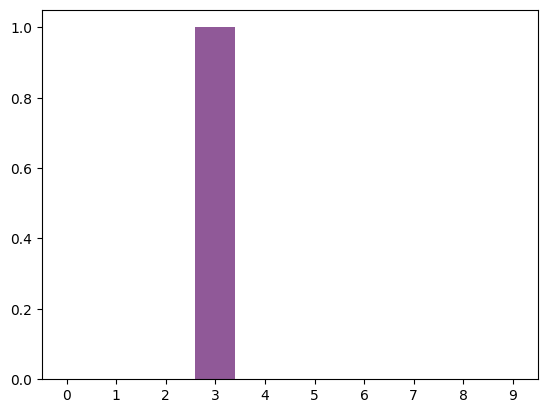

In [25]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction probabilities: [[1.0000000e+00 0.0000000e+00 1.7835770e-30 7.2613188e-33 0.0000000e+00
  0.0000000e+00 1.3474403e-29 0.0000000e+00 0.0000000e+00 8.8133488e-34]]
Predicted label: 0
Actual label: 0


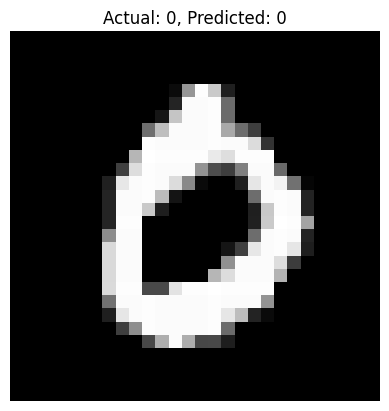

In [26]:
# Get the fourth element of the test set (index 3)
fourth_test_image = test_images[3]

# Reshape the image to match the input shape the model expects (1, 784)
fourth_test_image = fourth_test_image.reshape(1, 784)

# Make the prediction
prediction = model.predict(fourth_test_image)

# Get the predicted class (label)
predicted_label = np.argmax(prediction)

print("Prediction probabilities:", prediction)
print("Predicted label:", predicted_label)
print("Actual label:", test_labels[3])

# Optional: Visualize the image
import matplotlib.pyplot as plt

plt.imshow(test_images_orig[3], cmap='gray')
plt.title(f"Actual: {test_labels[3]}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()


## **Step 5:** Evaluating the model on new data

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.7625
test_acc: 0.9667999744415283


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.